# Geospatial Analysis & Visualization with Python

## Lets Get Started!

### The first step with any python project is to import our packages

* We'll be working with five packages today: Numpy, Pandas, Geopandas, Scipy, and Matplotlib
    * Numpy is a package for dealing with multidmensionsal dataset
    * Pandas is general use package for working with tabular dataset
    * Geopandas is a geospatial exentson for Pandas
        * It to allow us to work with vector data (points, lines, & polgons)
    * Scipy is a statical pagckage
        * It will alow us to do linear regression and calculate chisquare
    * Matplotlib is a powerful plotting library that can be used to make visualizations

In [133]:
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook

# Now we can load the data

# Lets start with the records of police killings

* We'll load the Police Killing Data as a "DataFrame" using pandas
    * Then we'll convert it into a "GeoDataFrame" using Geopandas
        * To do this, we must assign the "geometry".  In this case its point data, and the coordinates are in lat/long
        * Then we need to assign a Coordiante Reference System (CRS) manually
            * ESPG is a standardized code that is used to represent CRSs.
            * 'espg:4326' is for the refers to the WGS 1984 datum, which our latitude/longitude data is based in.
                * This is a CRS that is widely used by many web-based platforms because like Google Maps and Mapbox
                * The original only had addresses, not coordinates, so we used a webservice (Mapbox) to generate the coordinates of our addresses
* Once we have the data loaded, calling .head() will give us a "preview" of our dataset

In [134]:
# We import the Police Killings file, and set the incident ID as the index
police_Killings_Tabular = pd.read_csv('Data/PoliceKillings.csv',
                                      parse_dates=['date'],
                                      index_col=['id_incident']
                                     )

# We can then convert the pandas dataframe into a geopandas "GeodataFrame"
police_Killings = gpd.GeoDataFrame(police_Killings_Tabular,
    geometry=gpd.points_from_xy(police_Killings_Tabular.longitude,
                                police_Killings_Tabular.latitude
                               )
                                  )

# Now we can assign a CRS
WGS_1984={'init' :'epsg:4326'}
police_Killings.crs = WGS_1984

# Lets sort the incidents by date and then take a quick look.
police_Killings=police_Killings.sort_values(by='date')
police_Killings.head()

,date,date.1,day_week,prov,city_town,postal_code,location_type,id_victim,Name,age,...,substance_abuse,summary,Department,charge_type,Charges,Officers Involved,latitude,longitude,geocoding_Notes,geometry
id_incident,,,,,,,,,,,,,,,,,,,,,
416,2000-01-01,2000-01-01,Sat,ON,Toronto,M5B 1W8,Urban,0416-V1,*****,26.0,...,No,Henry Musaka entered a hospital emergency room...,Toronto Police Service,None,No,0416-P1,43.65363,-79.37736,NaN,POINT (-79.37736 43.65363)
170,2000-01-07,2000-01-07,Fri,AB,Edmonton,T5R 1A1,Urban,0170-V1,*****,28.0,...,Yes,"Long Duy Hoang, also known as ‚ÄúCrazy Jimmy,‚...",Edmonton Police Service,None,No,0170-P1,53.52191,-113.57569,NaN,POINT (-113.57569 53.52191)
413,2000-01-30,2000-01-30,Sun,ON,Toronto,M4X 1C7,Urban,0413-V1,*****,49.0,...,Yes,"Officers responding to ""gun call"" at a rooming...",Toronto Police Service,None,No,0413-P1,43.66646,-79.37113,NaN,POINT (-79.37113 43.66646)
435,2000-04-07,2000-04-07,Fri,ON,Mississauga,L4T 1T8,Urban,0435-V1,*****,48.0,...,Yes,Police were responding to a 911 call reporting...,Peel Regional Police,None,No,0435-P1,43.72063,-79.63149,NaN,POINT (-79.63149 43.72063)
266,2000-04-11,2000-04-11,Tue,BC,Williams Lake,V2G 1N1,Urban,0266-V1,*****,67.0,...,Yes,There was a struggle between Paulsey (Paul) Al...,RCMP,None,No,0266-P1,52.12859,-122.13387,NaN,POINT (-122.13387 52.12859)


# Now we'll load some data from the 2016 Census

* We have a tabular dataset of population data.  We'll load that using pandas

In [135]:
# We'll import the tabualr census data with pandas
Census_Tabular = pd.read_csv('Data/Census.csv',index_col=['PRUID'])
Census_Tabular.head()

,prov,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Caucasian
PRUID,,,,,,,,,,,,,,,,
1,CA,35151728,1924635,1577060,1198545,780125,447320,523235,313260,264305,188710,92920,132090,232375,1673780,25803368
10,NL,519716,2645,2325,2350,1385,635,1375,335,220,75,60,145,255,45725,462186
11,PE,142907,925,2570,825,670,255,585,145,215,210,110,50,85,2735,133527
12,NS,923598,7905,8645,21910,3400,1685,8115,1195,1540,1540,695,635,1390,51490,813453
13,NB,747101,2535,3925,6995,1975,1285,2960,1230,735,1685,230,300,680,29380,693186


* We also have a provincial boundary shapefile that we can load with geopandas.
    * Shapefile are used to store georphric data.  They already have projections and coordiantes associated with them.
    * Geopandas has similar functionality to pandas.  But the read_file() method had less options, so we have to set the index manually.

In [136]:
# We'll import provincial boundaries using geopandas
Provincial_Boundaries = gpd.read_file('Data/Provincial_Boundaries.shp').set_index('PRUID')
Provincial_Boundaries.head()
# Provincial_Boundaries = Provincial_Boundaries.drop(['PRENAME','PRFNAME','PREABBR','PRFABBR','AREA_LCC','AREA_AEA','Area_Merc'],axis=1)
# Provincial_Boundaries.geometry = Provincial_Boundaries.simplify(100)
# Provincial_Boundaries.to_file('Data/Provincial_Boundaries.shp')
# Provincial_Boundaries.index

,PRNAME,geometry
PRUID,,
10,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
11,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84366..."
12,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84717..."
13,New Brunswic,"MULTIPOLYGON (((8176224.537 1722553.460, 81763..."
24,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."


# We want to join the tabular census data to the provincial boundary file.

* This will let us map the disparity by province and do a more detailed analysis

* PRUID is a "unique identifier" that represents the provinces.

    * Since both have the PRUID set as the index, we don't need to specify a join key.

In [137]:
Test_Join = Provincial_Boundaries.join(Census_Tabular)
Test_Join.head()

,PRNAME,geometry,prov,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Caucasian
PRUID,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84366...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84717...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,New Brunswic,"MULTIPOLYGON (((8176224.537 1722553.460, 81763...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# But our join fails :(

* ## Notice the NaN values

* Wonder Why?
    * Lets look at the index for both files?  Maybe we have a datatype missmatch?

In [138]:
print(Provincial_Boundaries.index.dtype)
print(Census_Tabular.index.dtype)

object
int64


## Sure enough!  The Provincial_Boundaries index is an "object", not an integer.

* We can fix that easily and then do the join!
    * We just need to change the datatype of the Provincial_Boundaries layer.

* ## How could we do this?
    * Hint The anser is in the cell above!!

In [139]:
dtype = 'int64'
Provincial_Boundaries.index = Provincial_Boundaries.index.astype(dtype)
Provincial_Boundaries = Provincial_Boundaries.join(Census_Tabular)
Provincial_Boundaries.head()

,PRNAME,geometry,prov,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Caucasian
PRUID,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NL,519716,2645,2325,2350,1385,635,1375,335,220,75,60,145,255,45725,462186
11,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84366...",PE,142907,925,2570,825,670,255,585,145,215,210,110,50,85,2735,133527
12,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84717...",NS,923598,7905,8645,21910,3400,1685,8115,1195,1540,1540,695,635,1390,51490,813453
13,New Brunswic,"MULTIPOLYGON (((8176224.537 1722553.460, 81763...",NB,747101,2535,3925,6995,1975,1285,2960,1230,735,1685,230,300,680,29380,693186
24,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",QC,8164361,90335,99505,319230,34910,133920,213740,62825,32405,8055,4575,9840,23040,182890,6949091


# Before we dig into the data, lets make a quick map.

## Our Layers need to be in the same coordinate system to match up properly on a map!

* We can re-project the police_Killings layer using the .to_crs function to set the CRS to that of the Provinces
    * The provinces layer uses the Canada Lambert Conformal Conic projection (LCC).  This is the standard projection used by stats canada and is ideally suited for displaying the whole of country.
        
### Once both datasets are in the same coordinate system, we can make a map!
* First we must define a plot, using the matplotlib.pyplot package.  We imported this earlier as "plt"
    * We use the plt.subplots() to create a figure, and we can define how big we want it to be
* Geoapndas can then use the .plot() fucntion to create a map using matplotlib.
    * We simply tell it what axis to draw the plot on with ax="axes"
    * Then set a few other parameters:
        * We just want the provinces as a grey background so we can set the color
        * We want to classify killings by race, so we can set race as the column.  THen we can add a legend to aid interpretation of the data

C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<IPython.core.display.Javascript object>


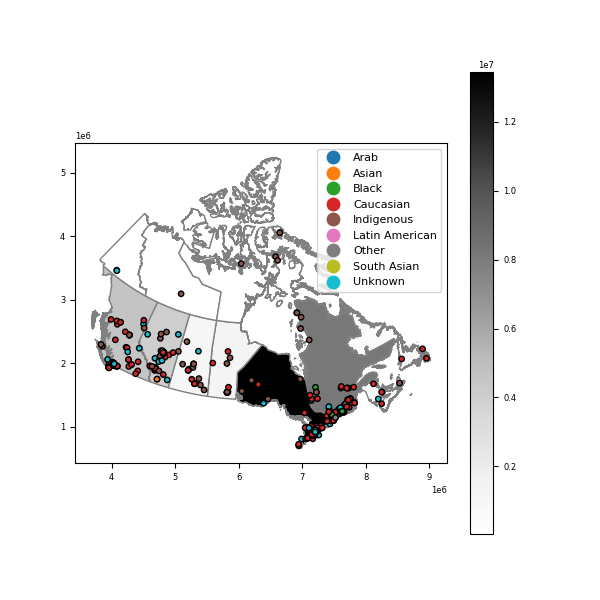

In [140]:
# We can use .to_crs() to create a police killings layer with the same projection as the provinces layer.
police_Killings = police_Killings.to_crs(Provincial_Boundaries.crs)

# Now, we can create a figure using matplotlib (plt), first we define the figure and the size
fig,axes=plt.subplots(
    figsize=(6,6)
)

# Now we can add the provinces using the .plot() function.  We set the plotting axes and give it a grey color
cb = Provincial_Boundaries.plot(
    ax=axes,
#     alpha=.5,
    column='Total',
    cmap = 'Greys',
    edgecolor='grey',
    legend=True,
)

# Then we add the police_Killings_LCC.  We'll set the column to 'race', so we can disply by race,
# give the point markers a few more parameters, and add them to a legend
police_Killings.plot(
    ax=axes,
    column='race',
    edgecolor='k',
    markersize=15,
    legend=True,
    legend_kwds={'loc': 'upper right','fontsize':8}
)

## And now you've made your first map with python!

# But its an ugly map :(

* It doesn't look great.  This is just the quick and dirty way to look ata data

* To make things more presentable, we'll have to be more explicit in setting up our map.  But that's a task for later.


# For now, lets move on and look at the dataset in more detail.

* Pandas & Geopandas have some nice features to quickly summarize our dataset.
* We can use .count() to get the total # incidents.
    * Callling .count() as is, will give us a list of all the columns, and a count for each.  We can see most collumns are "full" but in the "geocoding_Notes" column, we can see that 4 points don't have coordinates associated with their address.  This suggests there was an error in the data entry process.  We don't need to worry about this though.    

In [141]:
police_Killings.count()

date                             462
date.1                           462
day_week                         462
prov                             462
city_town                        462
postal_code                      462
location_type                    462
id_victim                        462
Name                             462
age                              455
gender                           462
race                             462
ethnic_ancestry                  107
immigrant_refugee_naturalized    462
armed_type                       462
cause_death                      462
taser_deployed                   462
injured_officer                  462
excited_delirium                 462
mentral_distress_disorder        462
substance_abuse                  462
summary                          462
Department                       462
charge_type                      462
Charges                          462
Officers Involved                462
latitude                         458
l

* We can use .mean(), .min(), etc. followed by ['age'] to get some vital statistics on the age of victims.

In [142]:
print('Age Distribution of Victims')
print()
print('Mean:                ',
      police_Killings.mean()['age']
     )
print()
print('Standard Deviation:  ',
      police_Killings.std()['age']
     )
print()
print('Youngest:            ',
      police_Killings.max()['age']
     )
print()
print('Oldest:              ',
      police_Killings.min()['age']
     )

Age Distribution of Victims

Mean:                 36.73186813186813

Standard Deviation:   11.775739256991544

Youngest:             77.0

Oldest:               15.0


# We can resample our data to look for trends
* The date column is a special type of data that allows us to resample our data by year, month, etc
* The dataset has to be in order by date for this to work (we did this alread).

<IPython.core.display.Javascript object>


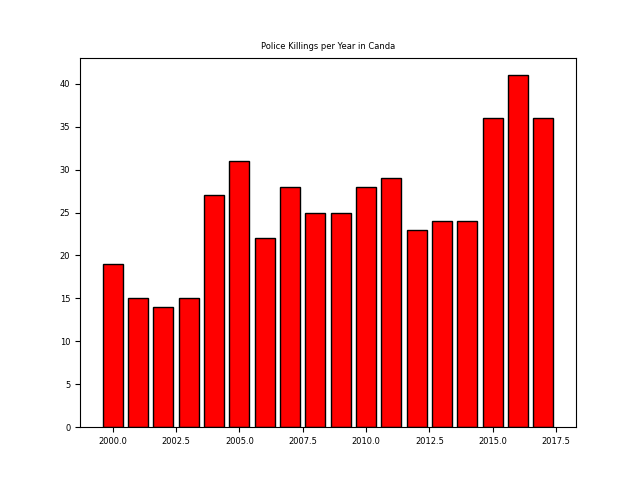

Text(0.5, 1.0, 'Police Killings per Year in Canda')

In [143]:
Resampled = police_Killings.set_index('date').resample('Y').count()


plt.figure()
plt.bar(
    Resampled.index.year,
    Resampled['id_victim'],
    edgecolor='black',
    facecolor='#FF0000'
)
plt.title('Police Killings per Year in Canda')

# We can group our data to look for patterns too.

* the .groupby() function can accept one or multple paramters to group our dataset by.
    * This allows us to create complex queries if we want.
* We can have to follow up with .count(), .mean(), etc.
    * This tells us "how" to aggregate

<IPython.core.display.Javascript object>


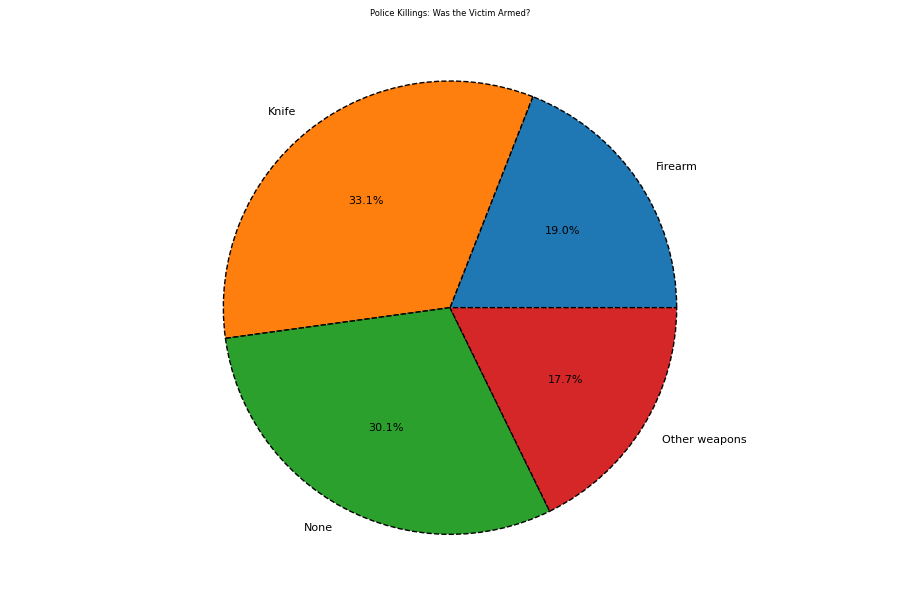

In [144]:
fig,ax = plt.subplots(figsize=(9,6))


Armed = police_Killings.groupby(['armed_type']).count()
ax.pie(
    Armed['id_victim'],
    labels=Armed.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
ax.set_title('Police Killings: Was the Victim Armed?')
plt.tight_layout()

In [145]:
police_Killings.groupby(['gender','mentral_distress_disorder']).count()

date  date.1  day_week  prov  city_town  \
gender mentral_distress_disorder                                            
Female No                            1       1         1     1          1   
       Unknown                       7       7         7     7          7   
       Yes                           6       6         6     6          6   
Male   No                           34      34        34    34         34   
       Unknown                     227     227       227   227        227   
       Yes                         187     187       187   187        187   

                                  postal_code  location_type  id_victim  Name  \
gender mentral_distress_disorder                                                
Female No                                   1              1          1     1   
       Unknown                              7              7          7     7   
       Yes                                  6              6          6     6   
Male   No                                  34             34         34    34   
       Unknown                            227            227        227   227   
       Yes                                187            187        187   187   

                                  age  ...  substance_abuse  summary  \
gender mentral_distress_disorder       ...                             
Female No                           1  ...                1        1   
       Unknown                      7  ...                7        7   
       Yes                          6  ...                6        6   
Male   No                          34  ...               34       34   
       Unknown                    221  ...              227      227   
       Yes                        186  ...              187      187   

                                  Department  charge_type  Charges  \
gender mentral_distress_disorder                                     
Female No                                  1            1        1   
       Unknown                             7            7        7   
       Yes                                 6            6        6   
Male   No                                 34           34       34   
       Unknown                           227          227      227   
       Yes                               187          187      187   

                                  Officers Involved  latitude  longitude  \
gender mentral_distress_disorder                                           
Female No                                         1         1          1   
       Unknown                                    7         7          7   
       Yes                                        6         6          6   
Male   No                                        34        33         33   
       Unknown                                  227       225        225   
       Yes                                      187       186        186   

                                  geocoding_Notes  geometry  
gender mentral_distress_disorder                             
Female No                                       0         1  
       Unknown                                  0         7  
       Yes                                      0         6  
Male   No                                       1        34  
       Unknown                                  2       227  
       Yes                                      2       187  

[6 rows x 28 columns]

# We're intersted in a specific question.  What's the distribution of police killings by race?


In [146]:
police_Killings.groupby(['race']).count()['date'].sort_values()

race
Latin American      3
Arab                5
Other               5
South Asian        10
Asian              15
Black              43
Indigenous         70
Unknown            99
Caucasian         212
Name: date, dtype: int64

# The racial demographics of Canada aren't evenly split however!

* We need to Normalize our data by population statistics.

* Lets look at our census data again


In [147]:
Provincial_Boundaries[Census_Tabular.columns]

,prov,Total,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japansese,"Visible minority, n.i.e",Mixed,Indigenous,Caucasian
PRUID,,,,,,,,,,,,,,,,
10,NL,519716,2645,2325,2350,1385,635,1375,335,220,75,60,145,255,45725,462186
11,PE,142907,925,2570,825,670,255,585,145,215,210,110,50,85,2735,133527
12,NS,923598,7905,8645,21910,3400,1685,8115,1195,1540,1540,695,635,1390,51490,813453
13,NB,747101,2535,3925,6995,1975,1285,2960,1230,735,1685,230,300,680,29380,693186
24,QC,8164361,90335,99505,319230,34910,133920,213740,62825,32405,8055,4575,9840,23040,182890,6949091
35,ON,13448494,1150415,754545,627715,311670,195955,210435,133860,154670,88940,30835,97970,128590,374395,9188499
46,MB,1278365,42060,22540,30340,79820,9895,5030,8565,2695,4375,1850,3200,6480,223310,838205
47,SK,1098352,29965,15540,14925,32340,4190,4300,5740,2070,1880,955,1145,2815,175020,807467
48,AB,4067175,230925,158200,129395,166200,55085,56700,43985,20980,21275,12165,9905,28355,258640,2875365


# The first row contains the total values for the whole country.  We can use this to calculate a police killing rate.

* But the Canadian Census' racial categories don't match up perfectly with the police violence dataset's racial
* How can we work around this?
    * We have the largest three groups in the police killing set: White, Indigenous, and Black.  So we can work with them as is
    * The other races make up a small portion of total killings.  And we can't be entirely sure how the CBC defined their groupings.  So, lets add a new category: "All_Other_Minority_Groups"
    
* We'll do this for both the provincial boundaires and the police_Killings
    * For the police killings, we'll leave the unknow records alone

In [148]:
All_Other_Minority_Groups=['South Asian', 'Chinese', 'Filipino','Latin American',
 'Arab', 'Southeast Asian', 'West Asian', 'Korean',
'Japansese', 'Visible minority, n.i.e', 'Mixed']
Provincial_Boundaries['All_Other_Minority_Groups']=Provincial_Boundaries[All_Other_Minority_Groups].sum(axis=1)
Provincial_Boundaries=Provincial_Boundaries.drop(All_Other_Minority_Groups,axis=1)

All_Other_Minority_Groups=['Latin American', 'Arab', 'Other', 'South Asian', 'Asian']
police_Killings['race'] = police_Killings['race'].replace(to_replace=All_Other_Minority_Groups,value='All_Other_Minority_Groups')


# From here, we can calculate the police killing rate.

* Dividing the total number of killings by the population gives us ...

In [149]:
Races = ['Indigenous','Black','Caucasian','All_Other_Minority_Groups']
Race_Breakdown = police_Killings.groupby(['race']).count()['id_victim']
Can_Pop = Provincial_Boundaries[Races].sum()

Racial_Rates = Race_Breakdown.T[Races]/Can_Pop
Racial_Rates['Average']=Race_Breakdown.T[Races].sum()/Can_Pop.sum()
print(Racial_Rates)
# police_Killings.groupby(['race']).count()['date'].sort_values()

race
Indigenous                   0.000042
Black                        0.000036
Caucasian                    0.000008
All_Other_Minority_Groups    0.000006
Average                      0.000010
dtype: float64


# This number isn't that meaningful though.  It represents the number of killings "per person" over the whole study period.

## Lets convert the rate to a more meaninful unit.  Killings / Million Residents / Year

### The date record is a "date" object.
* It has some added functionality like being able to query the the year, month, day

### How might we use this info to calculate our police killing rate?

<IPython.core.display.Javascript object>


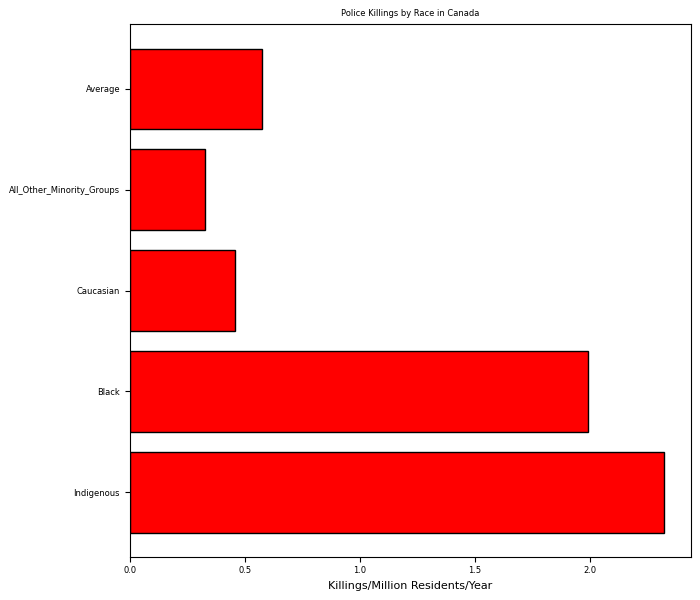

In [150]:
First_Year = police_Killings['date'].min().year
Last_Year = police_Killings['date'].max().year

Scale = 1e6
Duration = (Last_Year-First_Year)+1
rate_Conversion = Scale /  Duration

# Racial_Rates = Racial_Rates * rate_Conversion
# Racial_Rates

fig, ax = plt.subplots(figsize = (7,6))
ax.barh(
    Racial_Rates.index,
    Racial_Rates.values * rate_Conversion,
    facecolor='#FF0000',
    edgecolor='black',
    linewidth=1
)
ax.set_title('Police Killings by Race in Canada')
ax.set_xlabel('Killings/Million Residents/Year')
plt.tight_layout()

# The Police killing rates are 5x higher for Indigenous people and 4x higher for Black people than white people.

## This is an abhorent example of systemic racism in Canadian Policing.


## Now we  want to normalize by provincial demographics.

* We have a few more steps to go through first.
    * The police killings and census data use different abbreviations.  To do a join our dataset with the census data we'll need to assign an new abbreviaton
    * We'll us a dictionary to do this
* Then we can summarize the killings by province and join it to the Provinces_Join layer

## Now we can summarize the killings by province and join it to the Provinces_Join layer
* Note Prince Edward Island doesn't have any.

In [151]:

race_by_Province = police_Killings.groupby(['prov','race']).count()
race_by_Province = race_by_Province['date'].unstack()
race_by_Province['Total'] = race_by_Province.sum(axis=1)


for col in Races:
    Provincial_Boundaries = Provincial_Boundaries.join(race_by_Province[col],on='prov',rsuffix='_Killings')

for col in ['Unknown','Total']:
    Provincial_Boundaries = Provincial_Boundaries.join(race_by_Province[col],on='prov',rsuffix='_Killings')
Provincial_Boundaries

# Some provines/groups don't have any records.  Those are given NaN values, and need to be repalced with zeros
Provincial_Boundaries[[x+'_Killings' for x in Races]]=Provincial_Boundaries[[x+'_Killings' for x in Races]].fillna(0)
Provincial_Boundaries['Total_Killings']=Provincial_Boundaries['Total_Killings'].fillna(0)
Provincial_Boundaries[['Unknown' for x in Races]].fillna(0)

Provincial_Boundaries.head()

,PRNAME,geometry,prov,Total,Black,Indigenous,Caucasian,All_Other_Minority_Groups,Indigenous_Killings,Black_Killings,Caucasian_Killings,All_Other_Minority_Groups_Killings,Unknown,Total_Killings
PRUID,,,,,,,,,,,,,,
10,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NL,519716,2350,45725,462186,9455,0.0,0.0,3.0,0.0,NaN,3.0
11,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84366...",PE,142907,825,2735,133527,5820,0.0,0.0,0.0,0.0,NaN,0.0
12,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84717...",NS,923598,21910,51490,813453,36745,1.0,0.0,2.0,0.0,NaN,3.0
13,New Brunswic,"MULTIPOLYGON (((8176224.537 1722553.460, 81763...",NB,747101,6995,29380,693186,17540,0.0,0.0,3.0,0.0,1.0,4.0
24,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",QC,8164361,319230,182890,6949091,713150,8.0,8.0,53.0,3.0,15.0,87.0


# Lets calcualte the police killing rate (PKR) on the provincial level


<IPython.core.display.Javascript object>


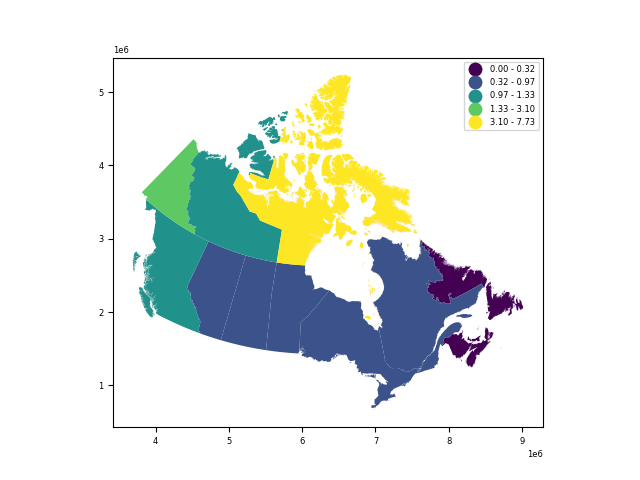

In [152]:
Provincial_Boundaries['PKR']=(Provincial_Boundaries['Total_Killings']/Provincial_Boundaries['Total']*rate_Conversion).round(2)

Provincial_Boundaries.plot(column='PKR',legend=True,scheme='naturalbreaks')

# Nunavut has a huge problem.  Its not a conicidence that the population is 75% Inuit.

# Now we can calculate a Police Killings Discrimination Index:

* For this, we'll compare the rates of police killings of black and indigenous people to white people

* We'll use the following equations:


\begin{align}
\ Wr & = (\frac{White Killings}{White Population}) * Rate Conversion\\
\ BIr & = (\frac{Black Killings + Indigenous Killings}{Black Population + Indigenous Population}) * Rate Conversion\\
\ PKDI & = BIr - Wr\\
\end{align}

* This will hightlight the disparities in police killings
    * We'll classify the data using the following scheme:
    
        * "Slight Bias": -0.483293 to 0.483293 - This is the rate killings of whites.  Within these ranges, differences might be due to presence or lacktherof of a certain groups 
        * "Moderate Bias": 0.48 to 0.77 - Greater than the white rate, less than the national average
        * "Severe Bias": 0.77 to 2.31 - Greater than the national rate, less than the indigenouos rate
        * "Extreme Bias: 2.31 to 10 - Greater than the national indigenous rate
    

In [153]:
Provincial_Boundaries['Wr']=Provincial_Boundaries['Caucasian_Killings']/Provincial_Boundaries['Caucasian']*rate_Conversion
Provincial_Boundaries['BIr']=(Provincial_Boundaries['Indigenous_Killings']+Provincial_Boundaries['Black_Killings'])/(Provincial_Boundaries['Indigenous']+Provincial_Boundaries['Black'])*rate_Conversion

Provincial_Boundaries['PKDI'] = Provincial_Boundaries['BIr'] - Provincial_Boundaries['Wr']

Provincial_Boundaries['PKDI']=Provincial_Boundaries['PKDI'].fillna(0)


bins = [-0.48,0.48,0.77,2.31,10.0]
labels = ['Minimal Biaias','Moderate Bias','Severe Bias','Extreme Bias']
Provincial_Boundaries['PKDI_Classes']=(pd.cut(Provincial_Boundaries['PKDI'],bins=bins,labels=labels)).astype('str')

Provincial_Boundaries.round(2)

# print(Provincial_Boundaries[['prov','PKDI','PKDI_Classes']].sort_values(by='PKDI').round(2))

,PRNAME,geometry,prov,Total,Black,Indigenous,Caucasian,All_Other_Minority_Groups,Indigenous_Killings,Black_Killings,Caucasian_Killings,All_Other_Minority_Groups_Killings,Unknown,Total_Killings,PKR,Wr,BIr,PKDI,PKDI_Classes
PRUID,,,,,,,,,,,,,,,,,,,
10,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NL,519716,2350,45725,462186,9455,0.0,0.0,3.0,0.0,NaN,3.0,0.32,0.36,0.00,-0.36,Minimal Biaias
11,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84366...",PE,142907,825,2735,133527,5820,0.0,0.0,0.0,0.0,NaN,0.0,0.00,0.00,0.00,0.00,Minimal Biaias
12,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84717...",NS,923598,21910,51490,813453,36745,1.0,0.0,2.0,0.0,NaN,3.0,0.18,0.14,0.76,0.62,Moderate Bias
13,New Brunswic,"MULTIPOLYGON (((8176224.537 1722553.460, 81763...",NB,747101,6995,29380,693186,17540,0.0,0.0,3.0,0.0,1.0,4.0,0.30,0.24,0.00,-0.24,Minimal Biaias
24,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",QC,8164361,319230,182890,6949091,713150,8.0,8.0,53.0,3.0,15.0,87.0,0.59,0.42,1.77,1.35,Severe Bias
35,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63787...",ON,13448494,627715,374395,9188499,3257885,7.0,30.0,65.0,17.0,33.0,152.0,0.63,0.39,2.05,1.66,Severe Bias
46,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60395...",MB,1278365,30340,223310,838205,186510,11.0,1.0,6.0,1.0,NaN,19.0,0.83,0.40,2.63,2.23,Severe Bias
47,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5294993.103...",SK,1098352,14925,175020,807467,100940,11.0,0.0,4.0,0.0,2.0,17.0,0.86,0.28,3.22,2.94,Extreme Bias
48,Alberta,"POLYGON ((5228304.177 2767597.891, 5087063.606...",AB,4067175,129395,258640,2875365,803775,11.0,2.0,29.0,7.0,22.0,71.0,0.97,0.56,1.86,1.30,Severe Bias


# Lets map the patterns

<IPython.core.display.Javascript object>


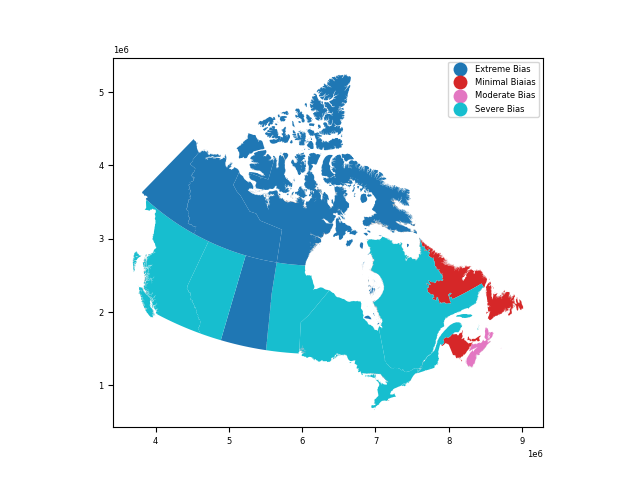

In [154]:
Provincial_Boundaries.plot(column='PKDI_Classes',legend=True)

# Lets combine this, with what else we've learned to make a detailed infographic on police violence in Canada

## Matplotlib alows us to be very specific in determining our layout with gridspec.

### We can create a large plot and define specifically what we want.

* We'll have two maps, showing the PKR and the PKDI on the left
* Then we'll add some smaller plots on the right showing the annual trend, national PKR by race, and some pie charts
* We can set our default ontsize for consistency

<IPython.core.display.Javascript object>


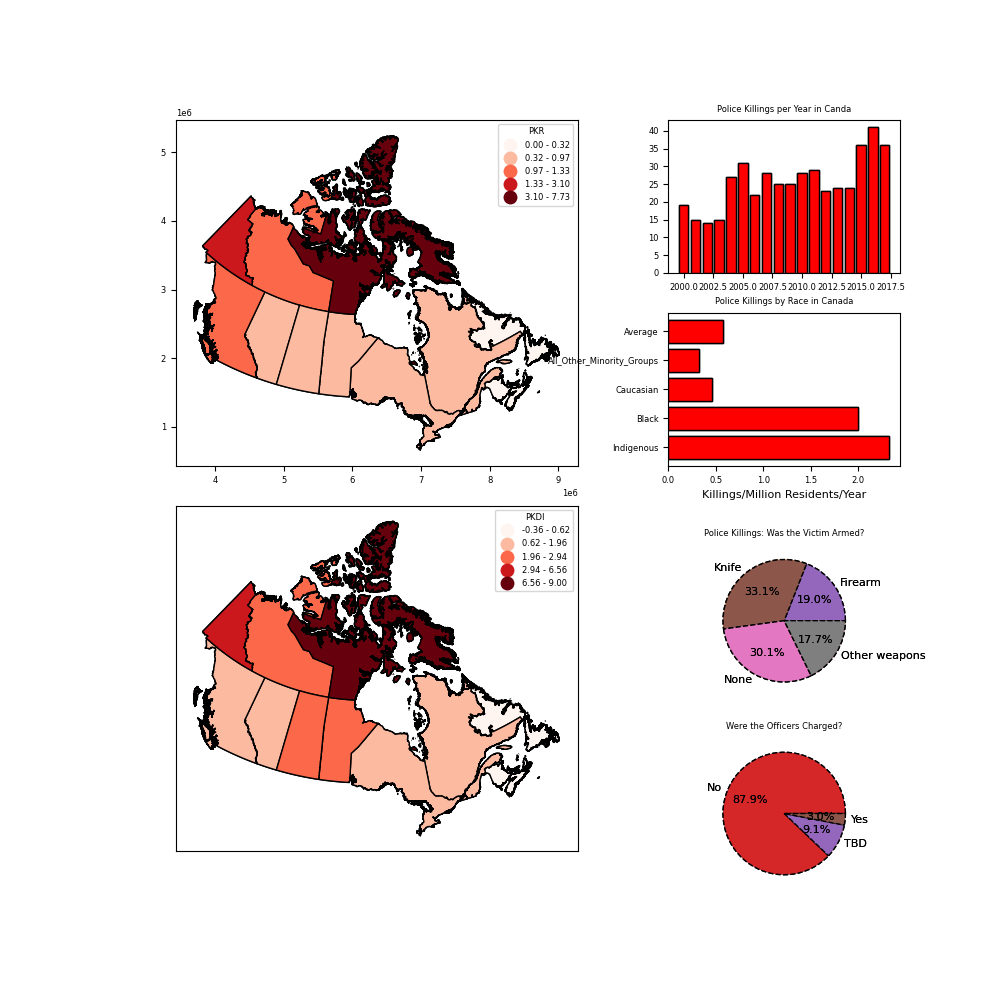

In [164]:
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

fig = plt.figure(figsize=(10,10))


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



gs = fig.add_gridspec(100,100)

PKR_Map = fig.add_subplot(gs[0:45 , 0:60])
PKDI_Map = fig.add_subplot(gs[50:95, 0:60])

Annual_Trend = fig.add_subplot(gs[0:20, 70:])
PKR_national = fig.add_subplot(gs[25:45, 70:])
Pie_1 = fig.add_subplot(gs[55:75, 70:])
Pie_2 = fig.add_subplot(gs[80:100, 70:])

# Now we can add things to the figure
* First lets do the maps

In [167]:
Provincial_Boundaries.plot(ax=PKR_Map,
                           column='PKR',
                           legend=True,
                           cmap = 'Reds',
                           edgecolor='black',
                           scheme='naturalbreaks')
PKR_Map.get_legend().set_title('PKR') 
PKR_Map.get_xaxis().set_visible(False)
PKR_Map.get_yaxis().set_visible(False)


Provincial_Boundaries=Provincial_Boundaries.sort_values(by='PKDI')
Provincial_Boundaries.plot(ax=PKDI_Map,
                           column='PKDI',
                           legend=True,
                           edgecolor='black',
                           cmap = 'Reds',
                           scheme='naturalbreaks')

# PKDI_Map.get_legend().set_bbox_to_anchor((1,0.5))
PKDI_Map.get_legend().set_title('PKDI') 
PKDI_Map.get_xaxis().set_visible(False)
PKDI_Map.get_yaxis().set_visible(False)

PKR_national.barh(
    Racial_Rates.index,
    Racial_Rates.values * rate_Conversion,
    facecolor='#FF0000',
    edgecolor='black',
    linewidth=1
)
PKR_national.set_title('Police Killings by Race in Canada')
PKR_national.set_xlabel('Killings/Million Residents/Year')

Annual_Trend.bar(
    Resampled.index.year,
    Resampled['id_victim'],
    edgecolor='black',
    facecolor='#FF0000'
)
Annual_Trend.set_title('Police Killings per Year in Canda')


Armed = police_Killings.groupby(['armed_type']).count()
Pie_1.pie(
    Armed['id_victim'],
    labels=Armed.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
Pie_1.set_title('Police Killings: Was the Victim Armed?')
# plt.tight_layout()


COD = police_Killings.groupby(['Charges']).count()
Pie_2.pie(
    COD['id_victim'],
    labels=COD.index,
    textprops={'fontsize': 8},
    autopct='%1.1f%%',
    wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'}
)
Pie_2.set_title('Were the Officers Charged?')
plt.tight_layout()
plt.savefig('InfoGraphic.png')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


# To Do

Maybe Chi Square

Update legend labels

In [166]:

Armed = police_Killings.groupby(['race','armed_type']).count()['date'].unstack().fillna(0)#/\
# (Armed.T/Armed.sum(axis=1))[['Caucasian','Black','Indigenous']]
Observed = Armed.T[['Caucasian','Black','Indigenous']]

Expected = Observed.copy()

Expected = Armed.T.sum(axis=1).values[:,np.newaxis]*\
       Can_Pop[['Caucasian','Black','Indigenous']].values/Can_Pop['Total'].values

police_Killings.groupby('race').count()['date'].values

In [ ]:
# police_Killings.groupby('immigrant_refugee_naturalized').count()
print(Expected)

print(Observed)

print(scipy.stats.chisquare(Observed,Expected))

Yearly=police_Killings.set_index('date').resample('Y').count()
# print(Yearly)

reg=scipy.stats.linregress(Yearly.index.year,Yearly.race)
# plt.figure()
ax2.bar(Yearly.index.year,Yearly.race,edgecolor='k')
print(reg)
ax2.plot(Yearly.index.year,Yearly.index.year*reg.slope+reg.intercept,color='k',
         label = 'Slope = '+str(np.round(reg.slope,2))+' Killings per Year '\
        ' P = '+str(np.round(reg.pvalue,2)))
ax2.legend()

In [ ]:



# Provinces_Killings['Indigenous_pct'] = Provinces_Killings['Indigenous']/Provinces_Killings['Total']
# Provinces_Killings['Black_pct'] = Provinces_Killings['Black']/Provinces_Killings['Total']

# Provinces_Killings.plot(ax=ax1,column='Rate',edgecolor='k',legend=True,scheme='natural_breaks')
# # ax3.bar(Provinces_Killings.index,Provinces_Killings['Rate'])
# # ax3.set_xticklabels(Provinces_Killings.index,rotation=30)
# Total = police_Killings.groupby('race').count()
# Rate = []
# Races = ['Black','Indigenous','Caucasian','Asian','South Asian']
# for race in Races:
#     Rate.append((Total['date'].T[race]/Provinces_Killings[race]).values[0]*1e6/17)
# Normalized_Rates = pd.DataFrame(index=Races,data={'Rate':Rate})
# ax4.bar(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k')
# ax4.set_title('Police Killing Rates in Canada')
# ax4.set_ylabel('Killings/Year/Million Residents')
# for breaks

# Provinces_Join.plot(ax=ax3,column='PDI',edgecolor='k',legend=True)#,scheme='natural_breaks')
# Provinces_Killings.plot(ax=ax2,column='Black_pct',edgecolor='k',legend=True,scheme='natural_breaks')
# plt.suptitle('Police Killing Rates Across Canada')

### Nunavut obviously has a serious problem.  75% of its population is Inuit & its rate is an order of magnitude higher than the other provinces or teritories.

### BC is the worst to of the provinces.  Lets select BC and investigate further.

* For We can select BC using the PREABBR value.
* We'll also re-project into UTM Zone 10 N, this is a more accurate coordinate system for this region

* Then we can look at the racial breakdown of killings in BC using the .groupby function again.
    * We'll create a new dataframe normalizing total killings for different races by total population within those groups
    * Then we can make a barplot highlighting racial biases 


In [ ]:
Mental_Health = police_Killings.groupby('mentral_distress_disorder').count()
ax1.pie(Mental_Health['id_victim'],labels=Mental_Health.index,textprops={'fontsize': 8},
        autopct='%1.1f%%',wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'})

In [ ]:
# ax3.set_title('PD Descrim Rayte')


Provinces_Join.plot(ax=ax,column='PDI',edgecolor='k',legend=True)

# ax2.plot([1,2],[0,1])
# plt.tight_layout()

In [ ]:
# 26910
BC = Provinces_Killings.loc[Provinces_Killings.index=='B.C.'].to_crs(26910)
BC_Killings = police_Killings.loc[police_Killings['PREABBR']=='B.C.'].to_crs(26910)
Total_BC = BC_Killings.groupby('race').count()

Rate = []
Races = ['Black','Indigenous','Caucasian','Asian','South Asian']
for race in Races:
    Rate.append((Total_BC['date'].T[race]/BC[race]).values[0]*1e6/17)
Normalized_Rates = pd.DataFrame(index=Races,data={'Rate':Rate})
plt.figure()
plt.bar(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k')
plt.title('Police Killing Rates in BC')
plt.ylabel('Killings/Year/Million Residents')
plt.savefig('BCPoliceKillings.png')
# print(Total_BC['Black']/BC['Black'])

# fig,ax=plt.subplots(figsize=(6,6))

# BC.plot(ax=ax,color='grey',edgecolor='k')
# BC_Killings.plot(ax=ax,column='race',legend=True)
# print(Canada.head())

# from fiona.crs import from_epsg
# from_epsg(2193)
# # Proj({'init': 'epsg:2193', 'no_defs': True}, preserve_flags=True)

## Lets make an infographic for BC, summarizing some of the key points

In [ ]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(10,10)
ax0 = fig.add_subplot(gs[0:6, 0:6])
BC.plot(ax=ax0,color='grey',edgecolor='k')
BC_Killings.plot(ax=ax0,column='race',legend=True,edgecolor='k')
ax0.axes.get_xaxis().set_visible(False)
ax0.axes.get_yaxis().set_visible(False)
ax0.set_title('Police Killings in BC 2000-2017')


ax1 = fig.add_subplot(gs[1:5, 6:])

Mental_Health = BC_Killings.groupby('mentral_distress_disorder').count()
ax1.pie(Mental_Health['id_victim'],labels=Mental_Health.index,textprops={'fontsize': 8},
        autopct='%1.1f%%',wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'})
ax1.set_title('Was it a Mental Health Crisis?')
# ax1.bar(BC_Year.index,BC_Year.race,width=300,edgecolor='k')
# ax1.set_title('Police Killings by Year in BC')
# ax1.set_ylabel('Number')

ax2 = fig.add_subplot(gs[6:, 0:6])
ax2.bar(Normalized_Rates.index,Normalized_Rates.Rate,edgecolor='k')
ax2.set_title('Police Killing Rates by Race in BC')
ax2.set_ylabel('Killings/Year/Million Residents')
ax2.set_xticklabels(Normalized_Rates.index,rotation=30)

BC_Killings.loc[BC_Killings.armed_type=='Knife, axe, other cutting instruments','armed_type']='Knife/Axe'
BC_Killings.loc[BC_Killings.armed_type=='Bat, club, other swinging object','armed_type']='Bat/Club'
BC_Killings.loc[BC_Killings.armed_type=='Air gun, replica gun','armed_type']='Fake Gun'
BC_Killings.loc[BC_Killings.armed_type=='Unknown','armed_type']='None'
Mental_Health = BC_Killings.groupby('armed_type').count()
ax3 = fig.add_subplot(gs[6:, 6:])
ax3.pie(Mental_Health['id_victim'],labels=Mental_Health.index,textprops={'fontsize': 8},
        autopct='%1.1f%%',wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'})
ax3.set_title('Were They Armed?')


plt.tight_layout()
# ax0 = fig.add_subplot(gs[0:6, 0:6])

# Save the data so we can use it in the future
* We're going to save it as a shapefile for use with geopandas or a desktop GIS
* We're also going to save it as a "GeoJSON" file.  This datatype is well suited for webmapping.  Which I cover in a dfferent workshp!

In [93]:
Provincial_Boundaries.to_file('Data/Provincial_Police_Violence.shp')
Provincial_Boundaries = Provincial_Boundaries.to_crs('epsg:4326')
Provincial_Boundaries.to_file("Data/Provincial_Police_Violence.json", driver = "GeoJSON")

# police_Killings = police_Killings.to_crs('epsg:4326')
# Temp=police_Killings[['prov','race','armed_type','age','mentral_distress_disorder','geometry']]
# print(Temp.head())
# Temp.to_file("Data/PoliceKillings.json", driver = "GeoJSON")

C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [96]:


import json
import pandas as pd
import requests


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
us_states = f'{url}/us-states.json'
US_Unemployment_Oct2012 = f'{url}/US_Unemployment_Oct2012.csv'

geo_json_data = json.loads(requests.get(us_states).text)

unemployment = pd.read_csv(US_Unemployment_Oct2012)

unemployment_dict = unemployment.set_index('State')['Unemployment']



In [103]:
print(geo_json_data)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}, {'type': 'Feature', '

In [106]:
m = folium.Map([43, -100], tiles='cartodbpositron', zoom_start=4)

def my_color_function(feature):
    """Maps low values to green and high values to red."""
    print(unemployment_dict[feature['id']])
    print(feature)
    if unemployment_dict[feature['id']] > 6.5:
        return '#ff0000'
    else:
        return '#008000'

    
folium.GeoJson(
    geo_json_data,
    style_function=lambda x: {
        'fillColor': my_color_function(x),
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

# m.save(os.path.join('results', 'Colormaps_0.html'))

m

7.1
{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
7.1
{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'A

In [108]:
# print(geo_json_data.feature)

AttributeError: 'dict' object has no attribute 'feature'